# <font color= 'red'> PA005 - High Value Customer Identification

# Imput

## Business Challenge

- Select the most valuable customers to build the loyalty program called 'Insiders'.
- Data set with more product sales during the year. ( Nov/2015 - Dec/2017 )

# Output

1. Indication of people to be part of the program.
2. A report with the answers to following question:
    - Who are the eligible people for the Insiders Program?
    - How many people will be in the group?
    - Which are the main characteristics of these customers?
    - What is the percentage revenue contribution coming from Insiders?
    - What is the revenue expectation for the next few months?
    - Which are the conditions for the people to be eligible from the program?
    - Which are the conditions for the people to be removed from the program?
    - What is the guarantee that the Insiders Problem is better than the rest of the base?
    - What are the action the marketing time can do to enhance the revenue?

# Task - Process

1. Who are the eligible people for the Insiders Program?
    - What is be eligible? What are high value customers?
    - Income:
        - High averange ticket;
        - High LTV;
        - Low recently;
        - High basket size;
        - Low Churn probability;
        - High LTV probability;
        - High buy propensity;
        
        
   - Cost:  
        - Low return rate;
    
    
   - Buyer Experience:
        - High averange rate;
2. How many people will be in the group?
    - Total customers number;
    - % Insider Group;
    
    
3. Which are the main characteristics of these customers?
    - Customer characteristics:
        - Age;
        - Location;
        
    -  Consumption characteristics:
        - Clustering Attributtes;
        
4. What is the percentage revenue contribution coming from Insiders?
    - Total revenue of the year;
    - Renenue of the Insiders group;
        
        
5. What is the revenue expectation for the next few months? 
    - LTV of the Insider Group;
    - Cohort Analysis;
    
    
6. Which are the conditions for the people to be eligible from the program?
    - Define the periodicity ( 1 month, 3 months);
    - The people needs to be similary or seemed to other people in the group?
    
    
7. Which are the conditions for the people to be removed from the program?
    - Define the periodicity ( 1 month, 3 months);
    - The people needs to be similary or seemed to other people in the group?
    
    
8. What is the guarantee that the Insiders Problem is better than the rest of the base?
    - A/B Test;
    - Bayesian A/B Test;
    - Hyphotesis Test;


9. What are the action the marketing time can do to enhance the revenue?
    - Discount;
    - Purchase Preferences
    - Front
    - Company Visit;

# 0.1 Import

In [75]:
import inflection
import pandas  as pd
import seaborn as sns

from IPython.core.display        import HTML

from yellowbrick.cluster import KElbowVisualizer


from sklearn import cluster as c
from sklearn import metrics as m
from plotly import express  as px
import matplotlib.pyplot    as plt

# 0.2 Helper Functions

In [35]:
def jupyter_settings(): 
    %matplotlib inline 
    #%matplotlib notebook
    %pylab inline
    
    plt.style.use('bmh')
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
     
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option ('display.expand_frame_repr', False)
    
    sns.set()

%matplotlib inline 
%matplotlib notebook

plt.style.use('bmh')
plt.rcParams['figure.figsize'] = [25, 12]
plt.rcParams['font.size'] = 24


display( HTML( '<style>.container { width:100% !important; }</style>') )
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.set_option ('display.expand_frame_repr', False)

sns.set()

jupyter_settings()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# <font color= 'red'> 1.0 Data Description

## 1.1 Loading Dataset

In [36]:
df_raw = pd.read_csv( '/Users/adriele/Documents/repos/pa005/data/ecommerce.csv', encoding='cp1252' )



In [37]:
# dropping extra column
df_raw = df_raw.drop( columns= ['Unnamed: 8'], axis=1 )

## 1.2 Rename Columns

In [38]:
df1 = df_raw.copy()
df_raw.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [39]:
# Renaming Cols
cols_old = [ 'InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']

snakecase = lambda x: inflection.underscore (x)

cols_new = list (map (snakecase , cols_old))

# rename
df1.columns = cols_new

## 1.3 Data Dimensions

In [40]:
print( 'Number of Cols {}'.format( df1.shape[1] ) )
print( 'Number of Rows {}'.format( df1.shape[0] ) )

Number of Cols 8
Number of Rows 541909


In [41]:
df1.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom


## 1.4 Check NA

In [42]:
df1.isna().sum()

invoice_no           0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
customer_id     135080
country              0
dtype: int64

## 1.5 Replace NA

In [43]:
# removing Na
df1 = df1.dropna( subset=[ 'description', 'customer_id'] )
print( 'Removed Data: {:.2f}%'.format( 1-( df1.shape[0] / df_raw.shape[0] ) ) )

Removed Data: 0.25%


In [44]:
df1.isna().sum()

invoice_no      0
stock_code      0
description     0
quantity        0
invoice_date    0
unit_price      0
customer_id     0
country         0
dtype: int64

## 1.6 Data Types

In [45]:
df1.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object

In [46]:
# Invoice Date
df1['invoice_date'] = pd.to_datetime( df1['invoice_date'], format='%d-%b-%y')

# Customer Id
df1['customer_id'] = df1['customer_id'].astype( int)

In [47]:
df1.dtypes

invoice_no              object
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
customer_id              int64
country                 object
dtype: object

# <font color= 'red'> 2.0 Feature Engineering

In [48]:
df2 = df1.copy()

## 2.1 Feature Creation

In [49]:
# Data reference
df_ref = df2.drop(['invoice_no', 'stock_code', 'description', 'quantity', 
          'invoice_date', 'unit_price', 'country'], axis=1).drop_duplicates( ignore_index=True )
df_ref.head()

,customer_id
0,17850
1,13047
2,12583
3,13748
4,15100


In [50]:
# Gross Revenue = quantity * price
df2['gross_revenue'] = df2['quantity'] * df2['unit_price']

# Monetary
df_monetary = df2[[ 'customer_id', 'gross_revenue' ]].groupby( 'customer_id' ).sum().reset_index()
df_ref = pd.merge( df_ref, df_monetary, on='customer_id', how='left' )

# Recency - Last day purchase
df_recency = df2[['customer_id', 'invoice_date']].groupby( 'customer_id' ).max().reset_index()
df_recency['recency_days'] = ( df2['invoice_date'].max() - df_recency['invoice_date'] ).dt.days
df_recency = df_recency[['customer_id', 'recency_days']].copy()
df_ref = pd.merge( df_ref, df_recency, on='customer_id', how='left' )

# Frequency - how often the customer use to buy
df_freq = df2[['customer_id', 'invoice_no']].drop_duplicates().groupby( 'customer_id').count().reset_index()
df_ref = pd.merge( df_ref, df_freq, on='customer_id', how='left')

In [51]:
df_ref.head()

,customer_id,gross_revenue,recency_days,invoice_no
0,17850,5288.63,302,35
1,13047,3079.10,31,18
2,12583,7187.34,2,18
3,13748,948.25,95,5
4,15100,635.10,330,6


# <font color= 'red'> 3.0 Feature Filtering

In [52]:
df3 = df_ref.copy()

# <font color= 'red'> 4.0 Exploratory Data Analysis

In [53]:
df4 = df3.copy()

# <font color= 'red'> 5.0 Data Preparation

In [54]:
df5 = df4.copy()

# <font color= 'red'> 6.0 Feature Selection

In [55]:
df6 = df5.copy()

# <font color= 'red'> 7.0 Fine Tunning Hyperparameter

In [56]:
x = df6.drop( columns=['customer_id'] )


In [57]:
clusters = [2, 3, 4, 5, 6]

# <font color= 'red'> 1.0 Data Description

## 7.1 Within Cluster Sum of Square ( WSS )

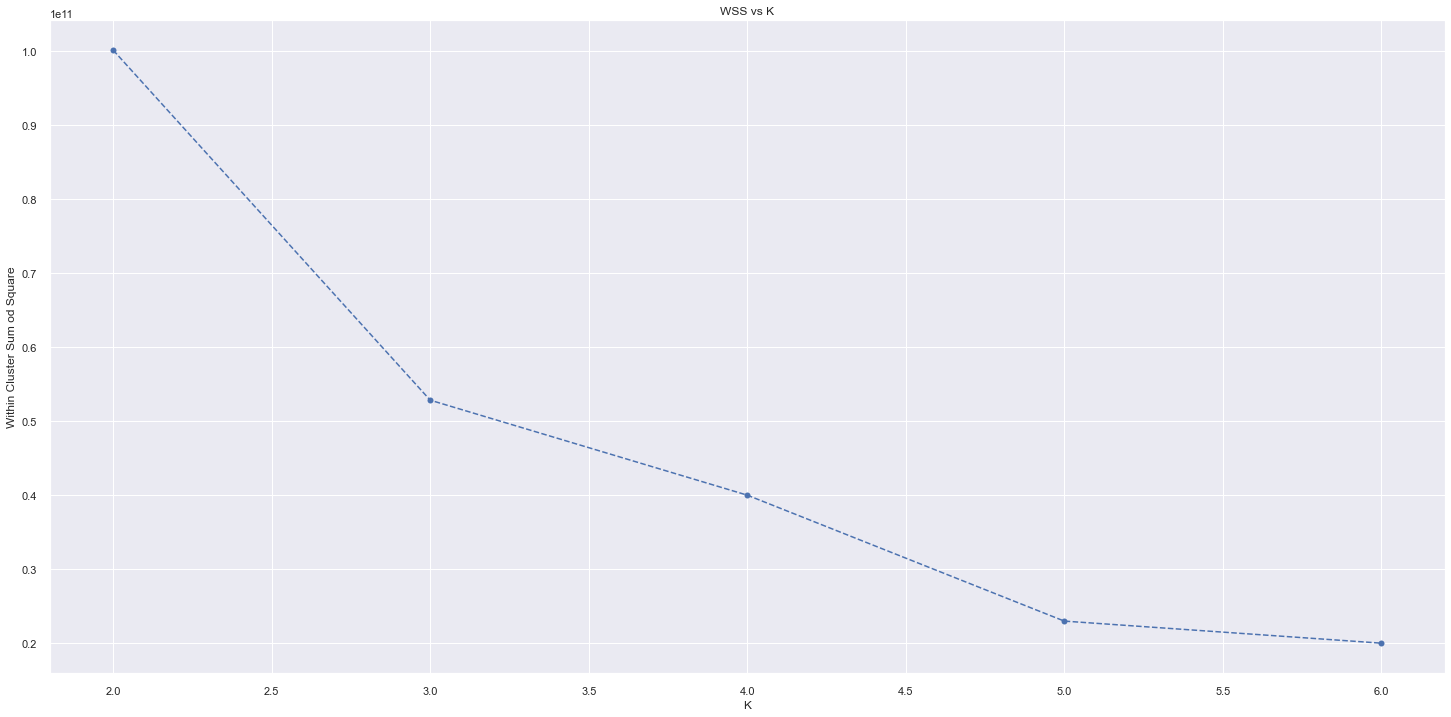

In [58]:
wss =[]
for k in clusters:
    # modeldefinition
    kmeans = c.KMeans( init='random', n_clusters=k, n_init=10, max_iter=300, random_state=42 )
    
    # model training
    kmeans.fit( x )
    
    # model validation
    wss.append( kmeans.inertia_ )
    
# plot wss
plt.plot( clusters, wss, linestyle='--', marker='o', color='b' )
plt.xlabel( 'K' )
plt.ylabel( 'Within Cluster Sum od Square' );
plt.title( 'WSS vs K');
    

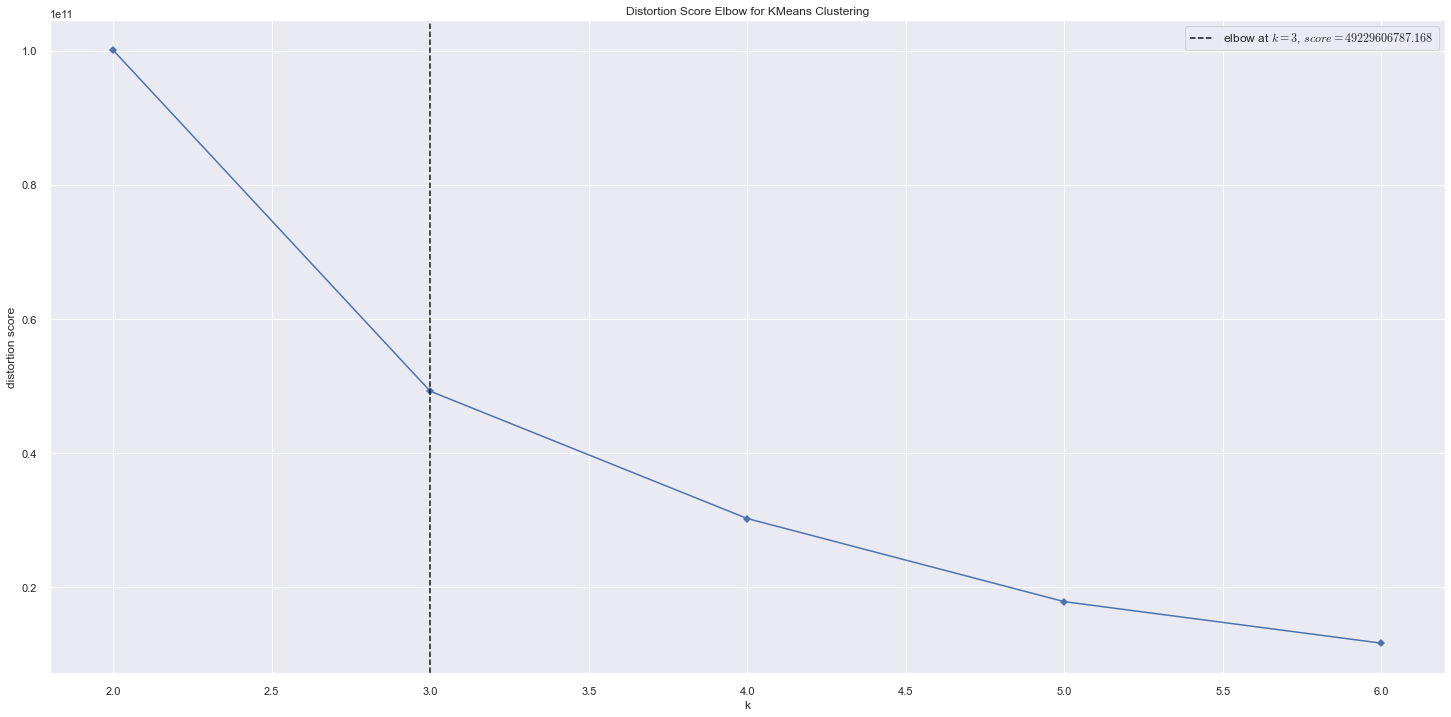

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [61]:
kmeans = KElbowVisualizer( c.KMeans(), k=clusters, timings=False )
kmeans.fit( x )
kmeans.show()

## 7.2 Silhouette Score

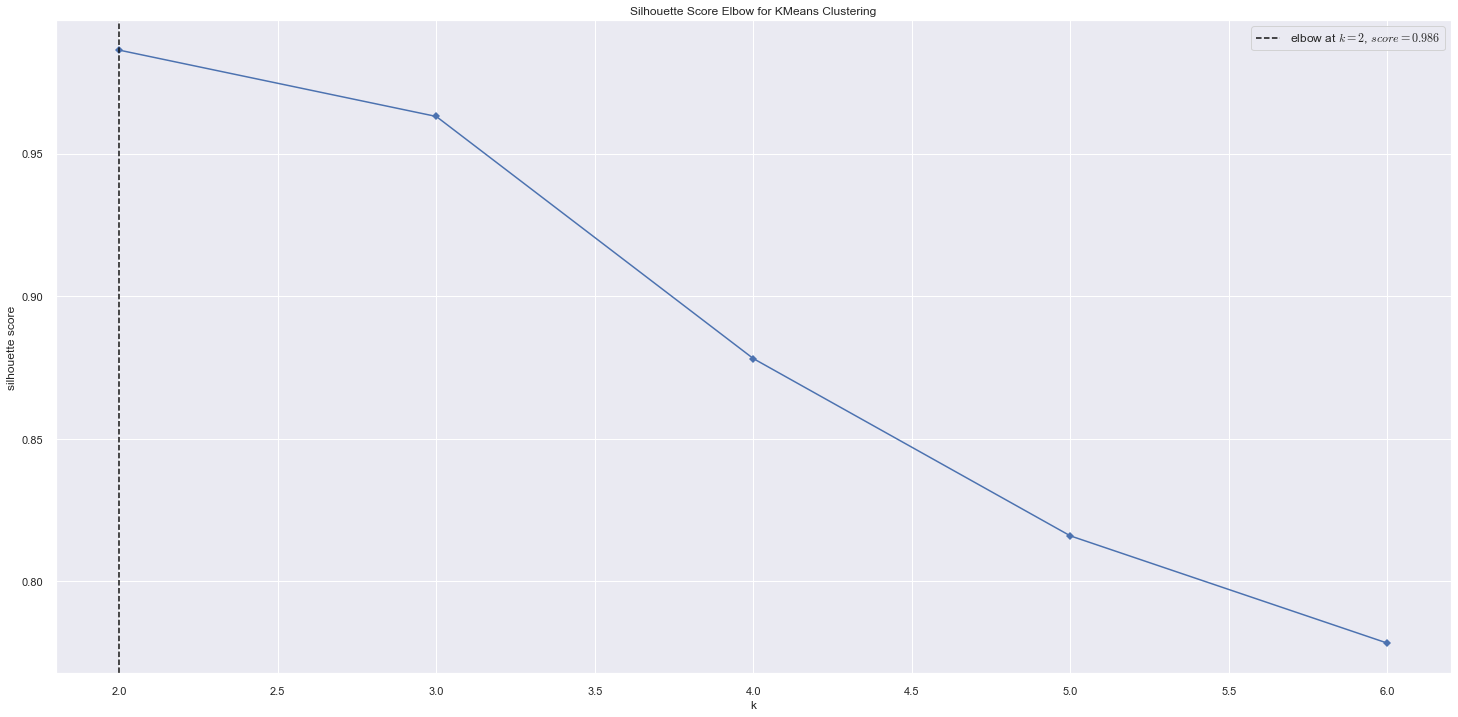

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [62]:
kmeans = KElbowVisualizer( c.KMeans(), k=clusters, metric='silhouette', timings=False )
kmeans.fit( x )
kmeans.show()

# <font color= 'red'> 8.0 Model Training

In [68]:
df8 = df6.copy()

## 8.1 K- Means

In [90]:
#Model definition
k = 3
kmeans =c.KMeans( init='random', n_clusters=k, n_init=10, max_iter=300 )

# Model training
kmeans.fit( x )

# Clustering
labels = kmeans.labels_

In [91]:
# WSS (Within cluster sum of square)
print( 'WSS value: {}'.format( kmeans.inertia_ ) )

# SS ( Silhouette score )
print( 'SS value: {}'.format( m.silhouette_score( x, labels, metric='euclidean' ) ) )

WSS value: 52830442008.00694
SS value: 0.9494677566681542


# <font color= 'red'> 9.0 Cluster Analysis

In [92]:
df9 = df8.copy()

## 9.1 Visualization Inpection

In [93]:
df9['cluster'] = labels
df9.head()

,customer_id,gross_revenue,recency_days,invoice_no,cluster
0,17850,5288.63,302,35,2
1,13047,3079.10,31,18,2
2,12583,7187.34,2,18,2
3,13748,948.25,95,5,2
4,15100,635.10,330,6,2


In [94]:
fig = px.scatter_3d( df9, x='recency_days', y='invoice_no', z='gross_revenue', color='cluster' )
fig.show()

## 9.2 Cluster Profile

In [79]:
# Number of customer
df_cluster = df9[['customer_id', 'cluster']].groupby( 'cluster' ).count().reset_index()
df_cluster['perc_customer'] = 100*( df_cluster['customer_id'] / df_cluster['customer_id'].sum() )

# Avg Gross Revenue
df_avg_gross_revenue = df9[['gross_revenue', 'cluster']].groupby( 'cluster' ).mean().reset_index()
df_cluster = pd.merge( df_cluster, df_avg_gross_revenue, how='inner', on='cluster' )

# Agv recency days
df_avg_recency_days = df9[['recency_days', 'cluster']].groupby( 'cluster' ).mean().reset_index()
df_cluster = pd.merge( df_cluster, df_avg_recency_days, how='inner', on='cluster' )

# Avg invoice no
df_avg_invoice_no = df9[['invoice_no', 'cluster']].groupby( 'cluster' ).mean().reset_index()
df_cluster = pd.merge( df_cluster, df_avg_invoice_no, how='inner', on='cluster' )

df_cluster.head()

,cluster,customer_id,perc_customer,gross_revenue,recency_days,invoice_no
0,0,4335,99.153705,1372.577826,92.257901,4.614533
1,1,31,0.709058,40543.517742,13.290323,53.290323
2,2,6,0.137237,182181.981667,7.166667,89.000000


## Cluster 01:  ( Insider Candidate )

  - Number of Customer = 4,335 ( 99% of customer )
  - Averange Recency   = 92 days;
  - Averange Purchase  = 5 purchase
  - Averang  Revenue   =  $ 1.372,57 dolars
  
# Cluster 02:

  - Number of Customer = 31 ( 71% of customer )
  - Averange Recency   = 13 days;
  - Averange Purchase  = 53 purchase
  - Averang  Revenue   =  $ 40,543,51 dolars  
  
# Cluster 03:

  - Number of Customer = 4 ( 14% of customer )
  - Averange Recency   = 7 days;
  - Averange Purchase  = 89 purchase
  - Averang  Revenue   =  $ 182,181.98 dolars    

# <font color= 'red'> 10.0 Deploy to production